# Feature Engineering

---

1. Import packages
2. Load data
3. Feature engineering

---

## 1. Import packages

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

---
## 2. Load data

In [2]:
df = pd.read_csv('/content/clean_data_after_eda.csv')
df["date_activ"] = pd.to_datetime(df["date_activ"], format='%Y-%m-%d')
df["date_end"] = pd.to_datetime(df["date_end"], format='%Y-%m-%d')
df["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"], format='%Y-%m-%d')
df["date_renewal"] = pd.to_datetime(df["date_renewal"], format='%Y-%m-%d')

In [3]:
df.sample(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,var_year_price_off_peak_var,var_year_price_peak_var,var_year_price_mid_peak_var,var_year_price_off_peak_fix,var_year_price_peak_fix,var_year_price_mid_peak_fix,var_year_price_off_peak,var_year_price_peak,var_year_price_mid_peak,var_6m_price_off_peak_var,var_6m_price_peak_var,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn
6392,c5231785965a9c1cf0bd02b2776373f4,foosdfpfkusacimwkcsosbicdxkicaua,66057,285447,6252,2011-09-06,2016-09-06,2015-05-24,2015-09-07,6617.31,6252,0.0,121.79,0.114481,0.098142,40.606701,t,604.17,7.40,7.40,2,747.84,4,lxidpiddsbxsbosboudacockeimpuepw,27.0,0.000025,0.000008,1.030047e-07,0.000000,0.000000,0.000000,0.000025,0.000008,1.030047e-07,0.000015,0.000004,1.318620e-07,0.000000,0.000000,0.000000,0.000015,0.000004,1.318620e-07,0
10986,6b0e8afa22ef8d86ac5239046a4d7075,foosdfpfkusacimwkcsosbicdxkicaua,5881,0,0,2012-10-20,2016-11-18,2015-11-01,2015-11-20,556.68,0,0.0,118.95,0.114667,0.099548,40.939027,f,0.00,29.64,29.64,1,84.52,3,lxidpiddsbxsbosboudacockeimpuepw,25.0,0.000017,0.000003,9.228409e-07,0.037312,0.028157,0.024061,0.037329,0.028160,2.406220e-02,0.000011,0.000003,1.655790e-06,0.065669,0.049556,0.042348,0.065680,0.049559,4.235011e-02,0
2494,c47b175df9b17d49654f79f297b09d8d,usilxuppasemubllopkaafesmlibmsdf,4798,0,529,2011-10-06,2016-10-06,2011-10-06,2015-10-11,0.45,0,0.0,6.49,0.145711,0.000000,44.311378,f,0.00,8.56,8.56,1,0.04,4,lxidpiddsbxsbosboudacockeimpuepw,11.4,0.000006,0.000000,0.000000e+00,0.004789,0.000000,0.000000,0.004794,0.000000,0.000000e+00,0.000004,0.000000,0.000000e+00,0.008428,0.000000,0.000000,0.008432,0.000000,0.000000e+00,1


---

## 3. Feature engineering

### Difference between off-peak prices in December and preceding January

Below is the code created by your colleague to calculate the feature described above. Use this code to re-create this feature and then think about ways to build on this feature to create features with a higher predictive power.

In [4]:
price_df = pd.read_csv('/content/price_data (1).csv')
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [5]:
# Group off-peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head()

,id,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.177779
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,1.500000
3,0010ee3855fdea87602a5b7aba8e42de,-0.010018,0.162916
4,00114d74e963e47177db89bc70108537,-0.003994,-0.000001


Now it is time to get creative and to conduct some of your own feature engineering! Have fun with it, explore different ideas and try to create as many as yo can!

In [6]:
# 1. Remove uninformative columns
columns_to_drop = [col for col in df.columns if df[col].nunique() <= 1]
df.drop(columns=columns_to_drop, inplace=True)

# 2. Extract new features from dates
df["activ_year"] = df["date_activ"].dt.year
df["activ_month"] = df["date_activ"].dt.month
df["contract_duration_days"] = (df["date_end"] - df["date_activ"]).dt.days
df["days_since_last_modif"] = (df["date_end"] - df["date_modif_prod"]).dt.days
df["days_to_renewal"] = (df["date_renewal"] - df["date_end"]).dt.days

# 3. Create features derived from numerical columns
df["avg_monthly_power_consumption"] = df["cons_12m"] / 12
df["cons_diff_forecast_vs_actual"] = df["forecast_cons_12m"] - df["cons_12m"]

# Discount ratio from energy price (with a protection factor to avoid division by zero)
df["discount_ratio"] = df["forecast_discount_energy"] / (df["forecast_price_energy_peak"] + 1e-6)

# Net margin ratio
df["net_margin_ratio"] = df["margin_net_pow_ele"] / (df["margin_gross_pow_ele"] + 1e-6)

# 4. Merge feature for difference between December and January (if not already present)
if "offpeak_diff_dec_january_energy" not in df.columns:
    price_df = pd.read_csv('/content/price_data (1).csv')
    price_df["price_date"] = pd.to_datetime(price_df["price_date"])

    monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({
        'price_off_peak_var': 'mean',
        'price_off_peak_fix': 'mean'
    }).reset_index()

    jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
    dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

    diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
    diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
    diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
    diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]

    df = pd.merge(df, diff, on='id', how='left')

# 5. Save the new dataset
df.to_csv('/content/final_dataset_with_engineered_features.csv', index=False)


In [7]:
df

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,var_year_price_off_peak_var,var_year_price_peak_var,var_year_price_mid_peak_var,var_year_price_off_peak_fix,var_year_price_peak_fix,var_year_price_mid_peak_fix,var_year_price_off_peak,var_year_price_peak,var_year_price_mid_peak,var_6m_price_off_peak_var,var_6m_price_peak_var,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn,activ_year,activ_month,contract_duration_days,days_since_last_modif,days_to_renewal,avg_monthly_power_consumption,cons_diff_forecast_vs_actual,discount_ratio,net_margin_ratio,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,0.000061,2.627605e-05,4.402763e-04,1.102785e+00,49.550703,22.022535,1.102846,4.955073e+01,22.022975,0.000131,4.100838e-05,9.084737e-04,2.086294,99.530517,44.235794,2.086425,9.953056e+01,4.423670e+01,1,2013,6,1096,227,-358,0.000000,0.00,0.0,1.0,0.020057,3.700961
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0.000005,6.089453e-04,0.000000e+00,6.464779e-03,0.000000,0.000000,0.006470,6.089453e-04,0.000000,0.000003,1.217891e-03,0.000000e+00,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000e+00,0,2009,8,2566,2566,-365,388.333333,-4470.05,0.0,1.0,-0.003767,0.177779
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0.000006,2.558511e-07,0.000000e+00,7.661891e-03,0.000000,0.000000,0.007668,2.558511e-07,0.000000,0.000004,9.450150e-08,0.000000e+00,0.000000,0.000000,0.000000,0.000004,9.450150e-08,0.000000e+00,0,2010,4,2192,2192,-365,45.333333,-496.04,0.0,1.0,-0.004670,0.177779
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0.000005,0.000000e+00,0.000000e+00,6.464721e-03,0.000000,0.000000,0.006470,0.000000e+00,0.000000,0.000003,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000003,0.000000e+00,0.000000e+00,0,2010,3,2192,2192,-365,132.000000,-1343.96,0.0,1.0,-0.004547,0.177779
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0.000015,3.552481e-06,2.522046e-06,5.428942e-03,0.001954,0.000869,0.005444,1.957971e-03,0.000871,0.000011,2.896760e-06,4.860000e-10,0.000000,0.000000,0.000000,0.000011,2.896760e-06,4.860000e-10,0,2010,1,2245,2245,-364,368.750000,-3979.25,0.0,1.0,-0.006192,0.162916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,2015-05-08,2014-05-26,4648.01,0,0.0,18.57,0.138305,0.000000,44.311378,t,0.00,27.88,27.88,2,381.77,4,lxidpiddsbxsbosboudacockeimpuepw,15.00

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 55 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   id                               14606 non-null  object        
 1   channel_sales                    14606 non-null  object        
 2   cons_12m                         14606 non-null  int64         
 3   cons_gas_12m                     14606 non-null  int64         
 4   cons_last_month                  14606 non-null  int64         
 5   date_activ                       14606 non-null  datetime64[ns]
 6   date_end                         14606 non-null  datetime64[ns]
 7   date_modif_prod                  14606 non-null  datetime64[ns]
 8   date_renewal                     14606 non-null  datetime64[ns]
 9   forecast_cons_12m                14606 non-null  float64       
 10  forecast_cons_year               14606 non-null  int64    

In [9]:
# Select important categorical columns
categorical_cols = ['channel_sales', 'origin_up', 'has_gas']

# Convert to indicators (one-hot encoding)
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [10]:
df["cons_change_recent_vs_avg"] = df["cons_last_month"] - df["avg_monthly_power_consumption"]


In [11]:
df["net_margin_discount_interaction"] = df["net_margin"] * df["discount_ratio"]
df["gas_vs_power_ratio"] = df["cons_gas_12m"] / (df["cons_12m"] + 1e-6)

In [13]:
import numpy as np
df["log_forecast_price_energy_peak"] = np.log1p(df["forecast_price_energy_peak"])
df["log_forecast_discount_energy"] = np.log1p(df["forecast_discount_energy"])

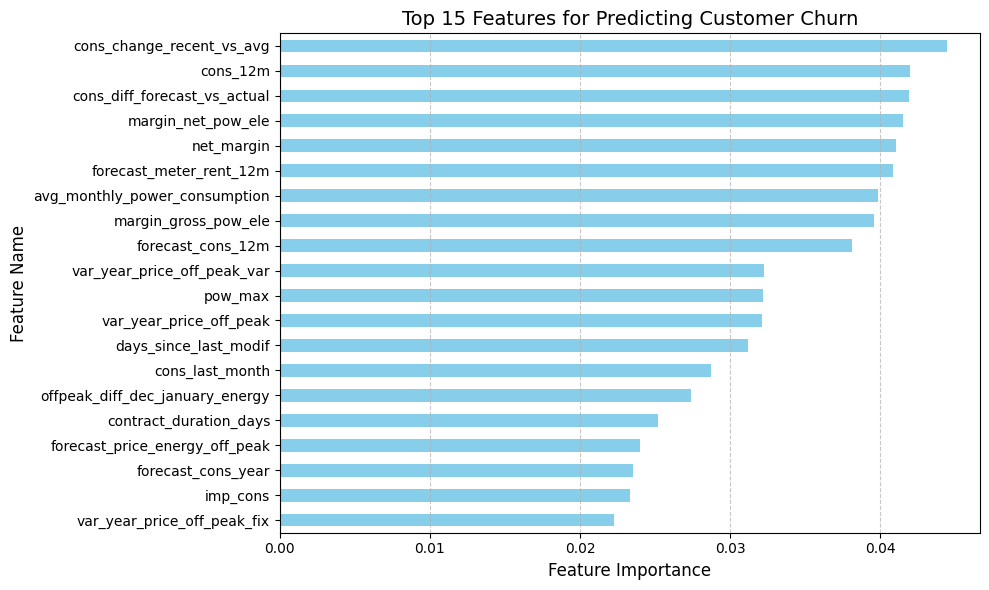

In [14]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

data = df.copy()

columns_to_drop = ['id', 'date_activ', 'date_end', 'date_modif_prod', 'date_renewal']
data = data.drop(columns=columns_to_drop)

data = data.select_dtypes(include=['int64', 'float64', 'bool', 'int32'])

X = data.drop(columns=['churn'])
y = data['churn']

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

importances = pd.Series(model.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(20)

plt.figure(figsize=(10, 6))
top_features.plot(kind='barh', color='skyblue')
plt.gca().invert_yaxis()
plt.title('Top 15 Features for Predicting Customer Churn', fontsize=14)
plt.xlabel('Feature Importance', fontsize=12)
plt.ylabel('Feature Name', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()